In [31]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [32]:
IMAGE_SIZE = [224, 224]

In [33]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [34]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [35]:
for layer in vgg.layers:
  layer.trainable = False

In [36]:
folders = glob('Datasets/Train/*')

In [37]:
x = Flatten()(vgg.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)

In [39]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [40]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [42]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp/ipykernel_2800/708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 1.5076 - accuracy: 0.3000 - val_loss: 2.7429 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 2.2924 - accuracy: 0.3000 - val_loss: 3.0185 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 9s 9s/step - loss: 2.1284 - accuracy: 0.5000 - val_loss: 2.4049 - val_accuracy: 0.2500
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 1.3257 - accuracy: 0.6000 - val_loss: 1.8429 - val_accuracy: 0.2500
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 0.7764 - accuracy: 0.6500 - val_loss: 2.0375 - val_accuracy: 0.2500


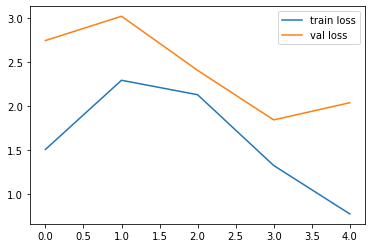

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [25]:
model.save("my_model.h5")

In [27]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\HP\VSCode Projects\AIproject\Transfer-Learning\my_model.h5')
model

In [43]:
model.predict(training_set)

1/1 [==============================] - 8s 8s/step


array([[0.04042063, 0.24670586, 0.07010695, 0.6427665 ],
       [0.00680148, 0.00489277, 0.00206708, 0.98623866],
       [0.5731291 , 0.18026723, 0.04959131, 0.19701234],
       [0.01821512, 0.12647118, 0.02667092, 0.8286428 ],
       [0.08182139, 0.5137669 , 0.02837826, 0.3760335 ],
       [0.06351906, 0.01369803, 0.00646581, 0.91631716],
       [0.24227242, 0.2807261 , 0.08071207, 0.39628947],
       [0.3214344 , 0.07807191, 0.11264808, 0.48784557],
       [0.07863187, 0.09570503, 0.17956622, 0.6460968 ],
       [0.03835161, 0.23160523, 0.18885958, 0.54118353],
       [0.08993912, 0.18883465, 0.02024793, 0.7009782 ],
       [0.06537843, 0.01188172, 0.00886539, 0.91387445],
       [0.04330173, 0.04728233, 0.02713379, 0.88228226],
       [0.23793699, 0.02854103, 0.01741511, 0.7161069 ],
       [0.05168281, 0.07786748, 0.18405971, 0.68639   ],
       [0.08485703, 0.10581826, 0.17765741, 0.6316673 ],
       [0.09703992, 0.12528494, 0.13369796, 0.6439772 ],
       [0.00235794, 0.0084604 ,

In [44]:
model.fit(test_set)

1/1 [==============================] - 2s 2s/step - loss: 2.0375 - accuracy: 0.2500


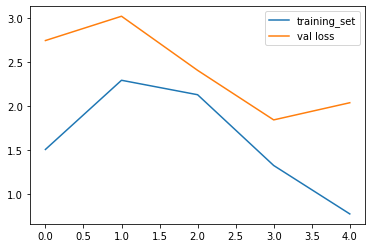

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(r.history['loss'], label='training_set')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

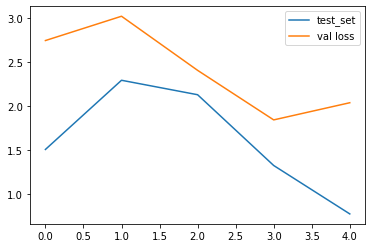

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(r.history['loss'], label='test_set')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')